In [1]:
# Import libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA

In [2]:
# We load the MNIST dataset below
mnist = fetch_openml('Fashion-MNIST', version=1, cache=True)

In [3]:
np.random.seed(123)

# Select 10000 images randomly
indices = np.random.choice(70000,10000) #Generate a uniform random sample from np.arange(70000) of size 10000
X = mnist.data[indices]/255.0
y = mnist.target[indices]
print(X.shape, y.shape)

(10000, 784) (10000,)


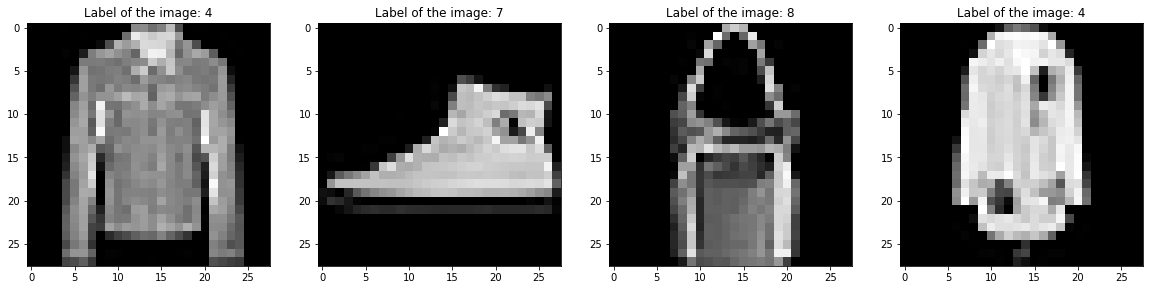

In [4]:
# Take a look at some of the pics in the dataset
plt.figure(figsize=(20,5))

plt.subplot(1,4,1)
plt.imshow(X[150].reshape(28,28), cmap='gray')
plt.title('Label of the image: {}'.format(y[150]))

plt.subplot(1,4,2)
plt.imshow(X[151].reshape(28,28), cmap='gray')
plt.title('Label of the image: {}'.format(y[151]))

plt.subplot(1,4,3)
plt.imshow(X[152].reshape(28,28), cmap='gray')
plt.title('Label of the image: {}'.format(y[152]))

plt.subplot(1,4,4)
plt.imshow(X[153].reshape(28,28), cmap='gray')
plt.title('Label of the image: {}'.format(y[153]))

plt.show()

In [5]:
# We just want the first two principal components"
pca = PCA(n_components=2)

# We get the components by calling fit_transform method with our data
pca_components = pca.fit_transform(X)

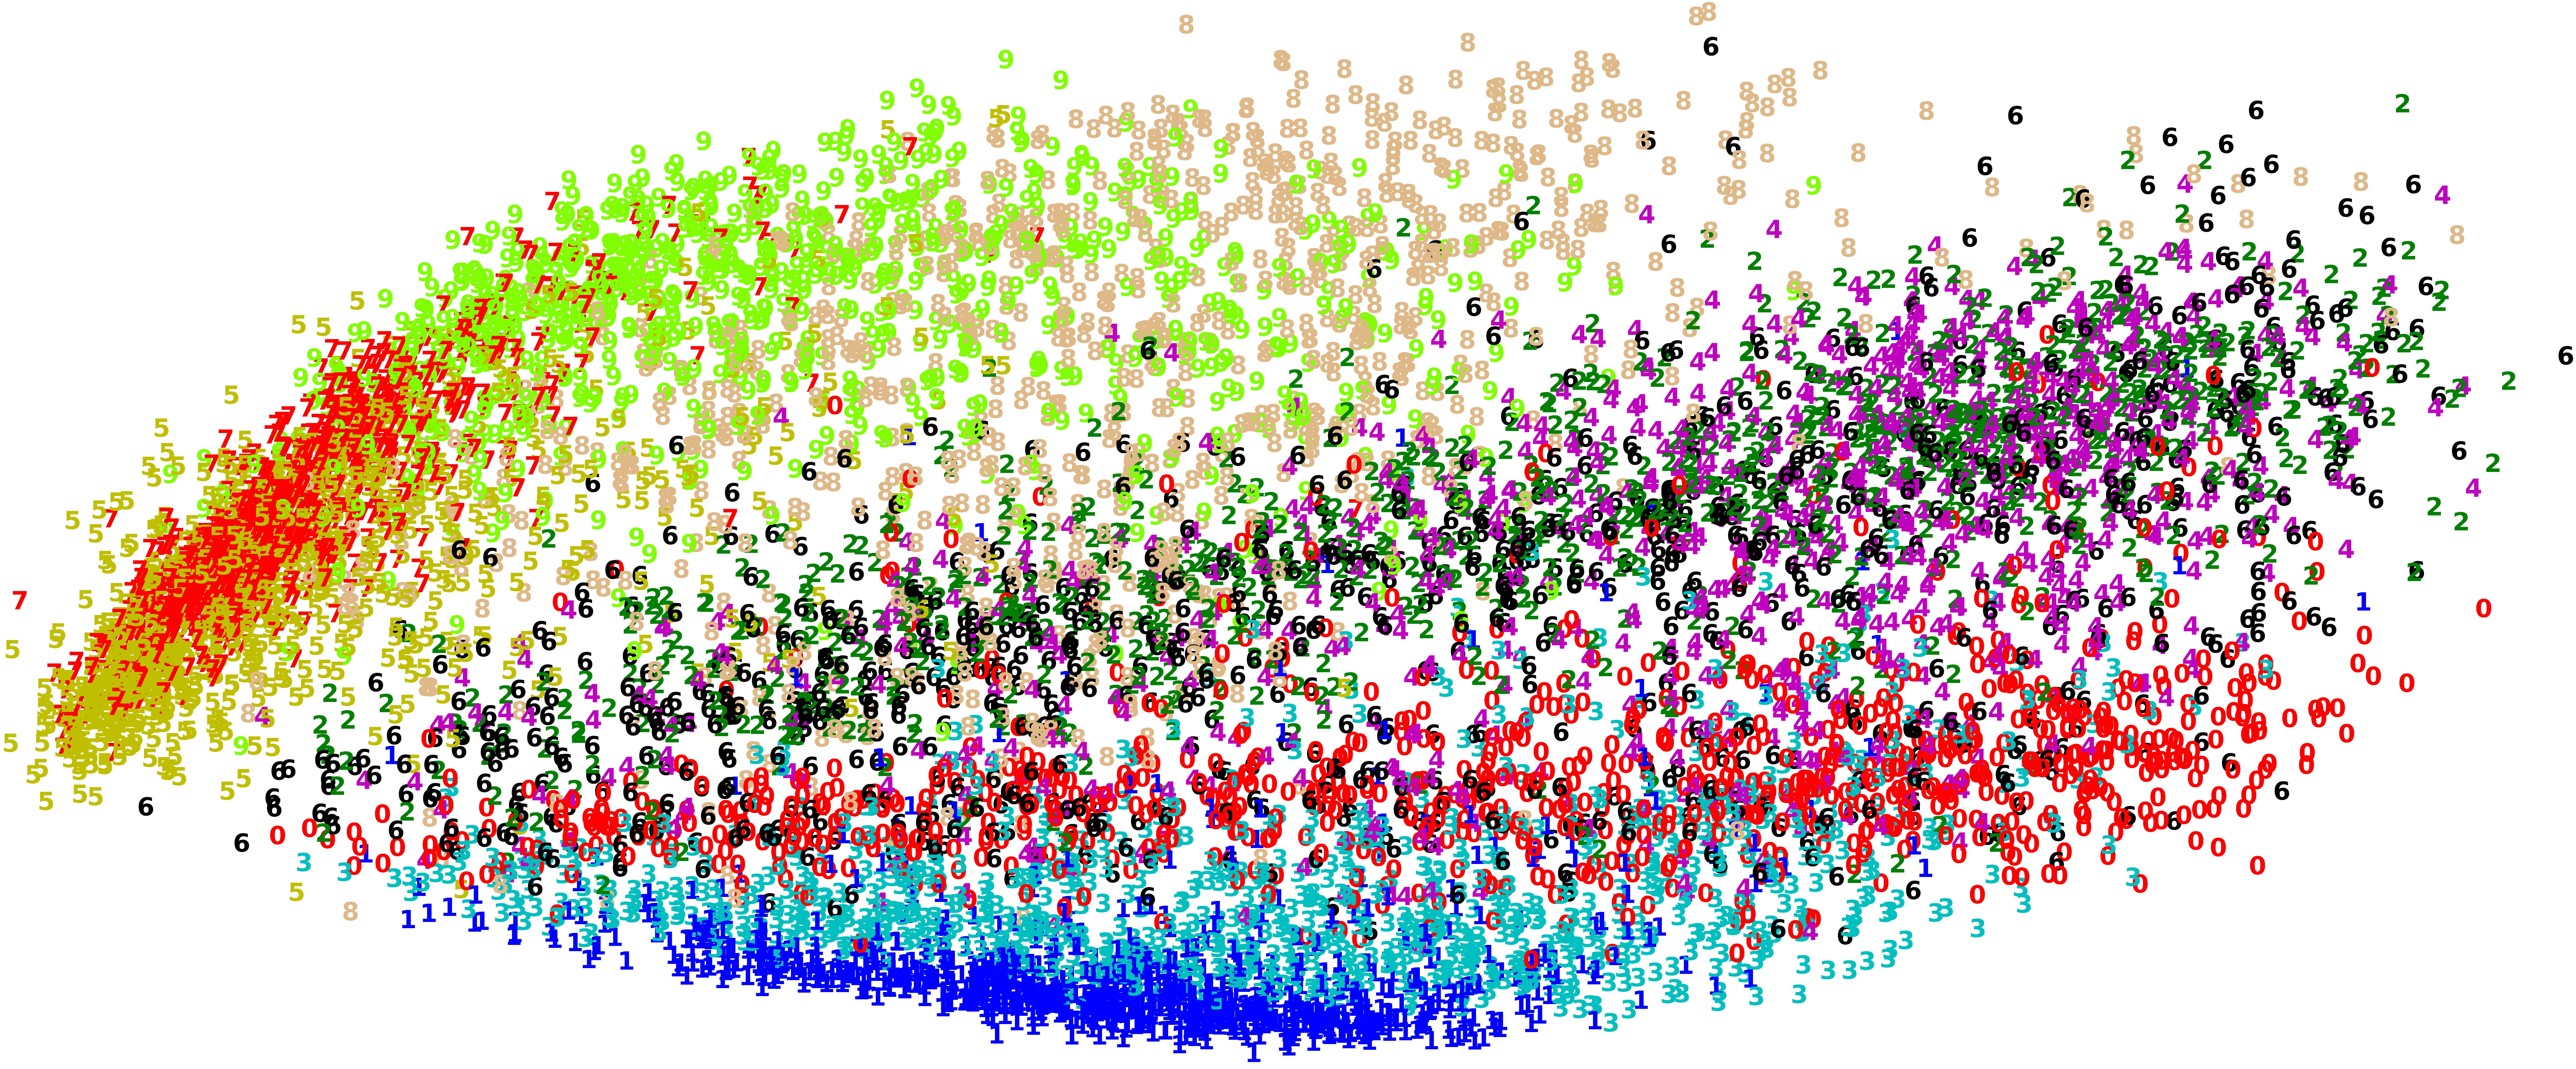

In [6]:
# Plot a graph of the data by coloring and labeling the data points"
plt.figure(figsize=(10,5))
colours = ['r','b','g','c','m','y','k','r','burlywood','chartreuse']

for i in range(pca_components.shape[0]):
    plt.text(pca_components[i, 0], pca_components[i, 1], str(y[i]),
             color=colours[int(y[i])],
             fontdict={'weight': 'bold', 'size': 100}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

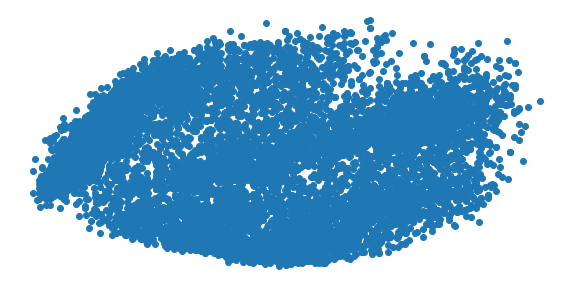

In [7]:
# Plot data without labels:
plt.figure(figsize=(10,5))
plt.scatter(pca_components[:, 0], pca_components[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()


Unfortunately the graph above doesn't enable us to infer the classes through visualization. As can be seen in the colored and labeled graph, PCA can gather together the observations of the same classes to some degree. However, observations from all of the classes intertwined each other and can't be distinguished without coloring or labeling. In this respect, PCA solution is not satisfactory.